<a href="https://colab.research.google.com/github/rhansen620/StatNLP2022/blob/main/Binary_Project_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Categorization for English/French texts

These are the modules we need to import

In [1]:
from typing import Iterator, Iterable, Tuple, Text, Union

import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import spmatrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

NDArray = Union[np.ndarray, spmatrix]
#print ("happy")

Mount to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Copy over your training/test files to colab so you can use them 


*   cp = copy
*   r = recursive (so it will copy all files and not just one)
*   first path = where the file is located in your drive
*   second path = where you want the file to go in colab (I would leave this the same)

In [3]:
!cp -r gdrive/MyDrive/Stat\ NLP /content/

Making tuples out of our training text where the first value is the label and the second value is the text

In [7]:
!ls Stat\ NLP

'attempt 3.ipynb'			    randomboth.csv
'Binary Project.ipynb'			    randomboth_test.txt
'Copy of attempt 3 personal albert.ipynb'   randomboth_train.txt


In [9]:
detectlanguage = open("Stat NLP/randomboth_train.txt") 
bm = []
texts = []
labels = []
for line in detectlanguage:
    eachline = line.split(" ", 1)
    label = eachline[0]
    text = eachline[1]
    #print (label)
    stripline = text.strip()
  #  print(stripline)
    r =([label, stripline.rstrip("\n")])
  #  print (r)
    bm.append(r)
    labels.append(label)
    texts.append(stripline)
#print (bm)
#print (texts)
#print (labels)

convert text to features

In [10]:
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=.8)    
vectorizer.fit_transform(texts)

<10823x4712 sparse matrix of type '<class 'numpy.int64'>'
	with 221216 stored elements in Compressed Sparse Row format>

Get the index of the feature - do not run unless you put your own feature in there!!!!!!!

In [11]:
vectorizer.vocabulary_.get('putthefeaturenamehere')

Turn those features into a matrix!!

In [12]:
features = vectorizer.transform(texts).toarray()
print (features.shape)

(10823, 4712)


texts --> labels init

In [13]:
le = preprocessing.LabelEncoder()
le.fit(labels)

LabelEncoder()

What are the labels?

In [14]:
list(le.classes_)

['ENGLISH', 'FRENCH']

Index of specific label

In [15]:
le.transform(labels)[0]

1

Creates a label vector

In [16]:
label2 = le.transform(labels)

Start the Logistic Regression

In [17]:
logreg = LogisticRegression(fit_intercept= True,class_weight= {0:3,1:9}, random_state = 0)

Train, baby, train!

In [18]:
logreg.fit(features, label2, sample_weight=None)

LogisticRegression(class_weight={0: 3, 1: 9}, random_state=0)

Evaluating the Training

In [19]:
train_acc = logreg.score(features, label2)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 99.90760417629123


Preprocess the data for the prediction (test)

In [21]:
detectlanguage = open("Stat NLP/randomboth_test.txt") 
texts1 = []
labelsone = []
for line in detectlanguage:
    eachline = line.split(" ", 1)
    label = eachline[0]
    text = eachline[1]
    stripline = text.strip()
    funtext = stripline.rstrip("\n")
    texts1.append(funtext)
    labelsone.append(label)
print (labelsone)

['ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'FRENCH', 'FRENCH', 'FRENCH', 'FRENCH', 'ENGLISH', 'FRENCH', 'FRENCH', 'FRENCH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'FRENCH', 'FRENCH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'FRENCH', 'ENGLISH', 'FRENCH', 'FRENCH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'FRENCH', 'ENGLISH', 'FRENCH', 'FRENCH', 'FRENCH', 'FRENCH', 'ENGLISH', 'ENGLISH', 'ENGLISH', 'FRENCH', 'ENGLISH', 'FRENCH', 

create label vector for these

In [22]:
labels1 = le.transform(labelsone)

In [23]:
features1 = vectorizer.transform(texts1).toarray()
print (features1.shape)

(3608, 4712)


predict

In [24]:
predictions = logreg.predict(features1)
print (predictions)

[0 0 1 ... 1 1 1]


Confusion Matrix

In [25]:
cm = confusion_matrix(labels1, predictions)

In [26]:
TN, FP, FN, TP = confusion_matrix(labels1, predictions).ravel()

In [27]:
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1952
False Positive(FP) =  22
True Negative(TN)  =  1621
False Negative(FN) =  13


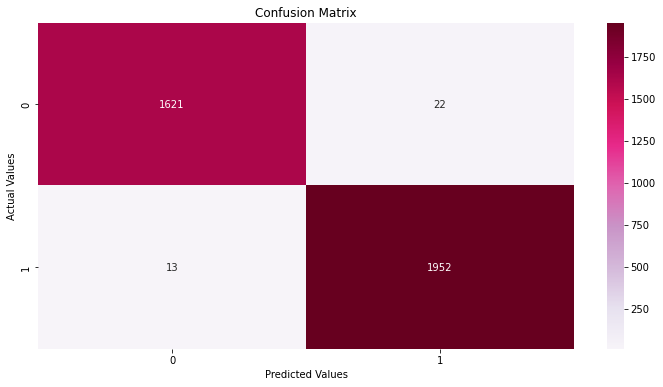

In [31]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='PuRd')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

Get the error analysis data!

In [50]:
listFN = []
listFP = []
for i in range(len(predictions)):
    if predictions[i] == 0:
        if labels1[i] == 1:
            listFP.append((texts1[i], labelsone[i]))
    elif predictions[i] == 1:
        if labels1[i] == 0:
            listFN.append((texts1[i], labelsone[i]))

print("False Negative: " + str(listFN))
print("False Positive: " + str(listFP))

False Negative: [('Oh! nothing wrong.', 'ENGLISH'), ('\\"Your turn has passed.', 'ENGLISH'), ('\\"Nothing, thanks.', 'ENGLISH'), ('Denise stopped and waited.', 'ENGLISH'), ('Bourdoncle yielded once more.', 'ENGLISH'), ('You can speak freely.', 'ENGLISH'), ('\\"Monsieur de Boves, Monsieur de Vallagnosc,\\" announced the footman.', 'ENGLISH'), ('4).', 'ENGLISH'), ('Denise heaved a sigh of relief.', 'ENGLISH'), ("I won't annoy you any more.", 'ENGLISH'), ('\\"Madame Aurélie?\\" inquired Denise.', 'ENGLISH'), ('Denise ran away.', 'ENGLISH'), ('You must muster up courage.', 'ENGLISH'), ('Napoleon III.', 'ENGLISH'), ('In the distance, Paris roared.', 'ENGLISH'), ('Several months passed away.', 'ENGLISH'), ('\\"To-morrow?\\"  This simple question troubled Denise.', 'ENGLISH'), ("On hearing Denise's remark Pauline laughed heartily.", 'ENGLISH'), ('Excuse me if I trouble you.', 'ENGLISH'), ("She's just received a letter.", 'ENGLISH'), ('Hutin went in first.', 'ENGLISH'), ('I prefer to die.', 'E

In [51]:
accuracy =  (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

Accuracy of the binary classification = 0.990


More Evaluations

In [52]:
test_acc = accuracy_score(labels1, predictions)

In [53]:
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 99.029933481153


In [54]:
print(classification_report(labels1, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1643
           1       0.99      0.99      0.99      1965

    accuracy                           0.99      3608
   macro avg       0.99      0.99      0.99      3608
weighted avg       0.99      0.99      0.99      3608

